# Pre-processing Data for Clustering

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

In [9]:
def load_data():
    imp = Imputer(missing_values=np.nan, strategy='most_frequent')
    train_df = pd.read_csv('yelp_dataset/businesses_train.csv')
    test_df = pd.read_csv('yelp_dataset/businesses_test.csv')
    data = train_df.append(test_df)
    data = data.drop(['business_id','categories','rating'], axis = 1)
    return pd.DataFrame(imp.fit_transform(data), columns=data.columns.values)

In [61]:
data = load_data()
data.head(5)

,$,$$,$$$,$$$$,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,...,paid,quiet,romantic,street,touristy,trendy,upscale,valet,validated,very_loud
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Categorizing Data for Clustering

In [64]:
def categorize_data(df):
    price_df = df['$']*1 + df['$$']*2 + df['$$$']*4 + df['$$$$']*8
    ambience_df = df['romantic']*1 + df['classy']*2 + df['hipster']*4 + df['intimate']*8 + df['divey']*16 + df['touristy']*32 + df['trendy']*64 + df['upscale']*128 + df['casual']*256
    GoodForMeal_df = df['dessert']*1 + df['latenight']*2 + df['lunch']*4 + df['dinner']*8 + df['breakfast']*16 + df['brunch']*32
    noise_df = df['average']*1 + df['loud']*2 + df['quiet']*4 + df['very_loud']*8
    alcohol_df = df['beer_and_wine']*1 + df['full_bar']*2 + df['none']*4
    attire_df = df['casual_attire']*1 + df['dressy']*2 + df['formal']*4
    wifi_df = df['no']*1 + df['free']*2 + df['paid']*4
    BusinessParking_df = df['garage']*1 + df['street']*2 + df['lot']*4 + df['valet']*8 + df['validated']*16
    df['Price'] = price_df
    df['Ambience'] = ambience_df
    df['GoodForMeal'] = GoodForMeal_df
    df['Noise'] = noise_df
    df['Alcohol'] = alcohol_df
    df['RestaurantsAttire'] = attire_df
    df['WiFi'] = wifi_df
    df['BusinessParking'] = BusinessParking_df
    df = df.drop(['$','$$','$$$','$$$$'], axis=1)
    df = df.drop(['romantic','classy','hipster','intimate','divey','touristy','trendy','upscale','casual'], axis=1)
    df = df.drop(['dessert','latenight','lunch','dinner','breakfast','brunch'], axis=1)
    df = df.drop(['average','loud','quiet','very_loud'], axis=1)
    df = df.drop(['beer_and_wine','full_bar','none'], axis=1)
    df = df.drop(['casual_attire','dressy','formal'], axis=1)
    df = df.drop(['no','free','paid'], axis=1)
    df = df.drop(['garage','street','lot','valet','validated'], axis=1)
    
    #Bin Elevations
    bins = [-50, 250, 500, 750, 1000, 1250, 3000]
    labels = [1,2,3,4,5,6]
    df['Elevation'] = pd.cut(df['elevation'], bins=bins, labels=labels)
    df = df.drop(['elevation'], axis=1)
    
    df = df.astype(int)
    return df

In [65]:
categorized = categorize_data(data)
categorized.head(10)

,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTableService,...,WheelchairAccessible,Price,Ambience,GoodForMeal,Noise,Alcohol,RestaurantsAttire,WiFi,BusinessParking,Elevation
0,0,1,0,1,1,0,0,1,1,0,...,0,2,0,0,1,0,1,0,2,5
1,0,1,1,1,0,1,0,1,0,0,...,1,2,0,0,0,4,1,1,6,4
2,1,0,0,1,1,0,0,1,1,1,...,0,2,0,0,1,1,1,2,0,1
3,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,2,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,1,0,1,0,0,0,1,0,0,...,1,1,256,2,1,4,1,1,4,2
6,1,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,2,0,1,0,0,1
8,1,1,0,1,1,1,0,1,0,0,...,1,1,256,12,1,2,1,1,4,2
9,1,1,0,1,0,0,1,1,1,1,...,1,2,0,4,4,2,1,1,0,1


# K-Modes Clustering for Categorical Data

https://github.com/nicodv/kmodes

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [95]:
from kmodes.kmodes import KModes
# Need to play with cluster size and number of iterations 
km = KModes(n_clusters=5, init='Huang', n_init=1, verbose=2)

In [96]:
clusters = km.fit_predict(categorized.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47666, cost: 556156.0
Run 1, iteration: 2/100, moves: 22026, cost: 522098.0
Run 1, iteration: 3/100, moves: 6682, cost: 520457.0
Run 1, iteration: 4/100, moves: 358, cost: 520457.0


In [97]:
categorized['Clusters'] = clusters

In [98]:
categorized.head(20)

,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTableService,...,Price,Ambience,GoodForMeal,Noise,Alcohol,RestaurantsAttire,WiFi,BusinessParking,Elevation,Clusters
0,0,1,0,1,1,0,0,1,1,0,...,2,0,0,1,0,1,0,2,5,2
1,0,1,1,1,0,1,0,1,0,0,...,2,0,0,0,4,1,1,6,4,2
2,1,0,0,1,1,0,0,1,1,1,...,2,0,0,1,1,1,2,0,1,3
3,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,2,4,2,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
5,1,1,0,1,0,0,0,1,0,0,...,1,256,2,1,4,1,1,4,2,3
6,1,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,2,0
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,2,0,1,0,0,1,2
8,1,1,0,1,1,1,0,1,0,0,...,1,256,12,1,2,1,1,4,2,4
9,1,1,0,1,0,0,1,1,1,1,...,2,0,4,4,2,1,1,0,1,3


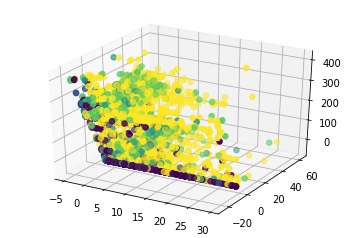

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
pca = PCA(3)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(categorized.iloc[:,0:21])

# Need to use 3D plot and 3 prinicipal components
# Plot based on the two dimensions, and shade by cluster label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=plot_columns[:,2], ys=plot_columns[:,1], zs=plot_columns[:,0],c=categorized["Clusters"], s=30)
plt.show()